# Building machine-learning models to predict whether a patient will suffer a stroke based on associated risk factors.
## author: Dr. Reynier Cruz Torres

## Data source and details:

https://www.kaggle.com/competitions/playground-series-s3e2/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Option for sampling later on

0 -> no sampling (bad performance in this case)

1 -> combined (upsampling of low class + downsampling of high class)

2 -> undersampling high class (bad performance in this case)

3 -> oversampling low class

In [2]:
sampling_option = 2

In [3]:
df = pd.read_csv('synthetic_data/train.csv')
df = df.drop('id',axis=1)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,15304.0,41.417708,21.444673,0.08,26.0,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.0,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.0,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.5,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.0,0.00,0.00,1.0


### Check the labels

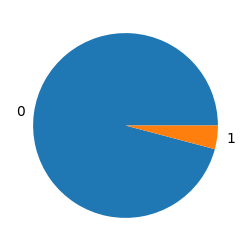

In [7]:
plt.figure(figsize=(3,3))
plt.pie(df['stroke'].value_counts(),labels=df['stroke'].unique())
plt.show()

##### we have imbalanced classes, which may turn into a problem. We'll have to deal with this later or the model performance will be deteriorated.

## Numerical data

In [8]:
numdf = df.select_dtypes(exclude=[object])

<AxesSubplot: >

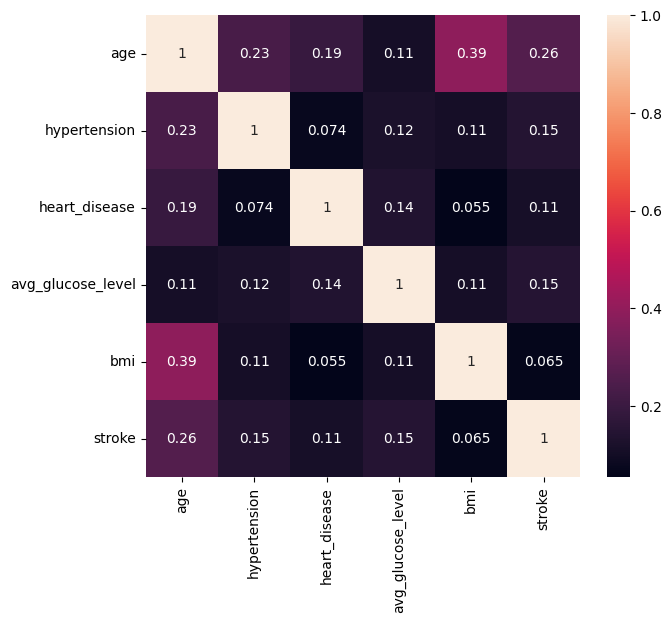

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(numdf.corr(),annot=True)

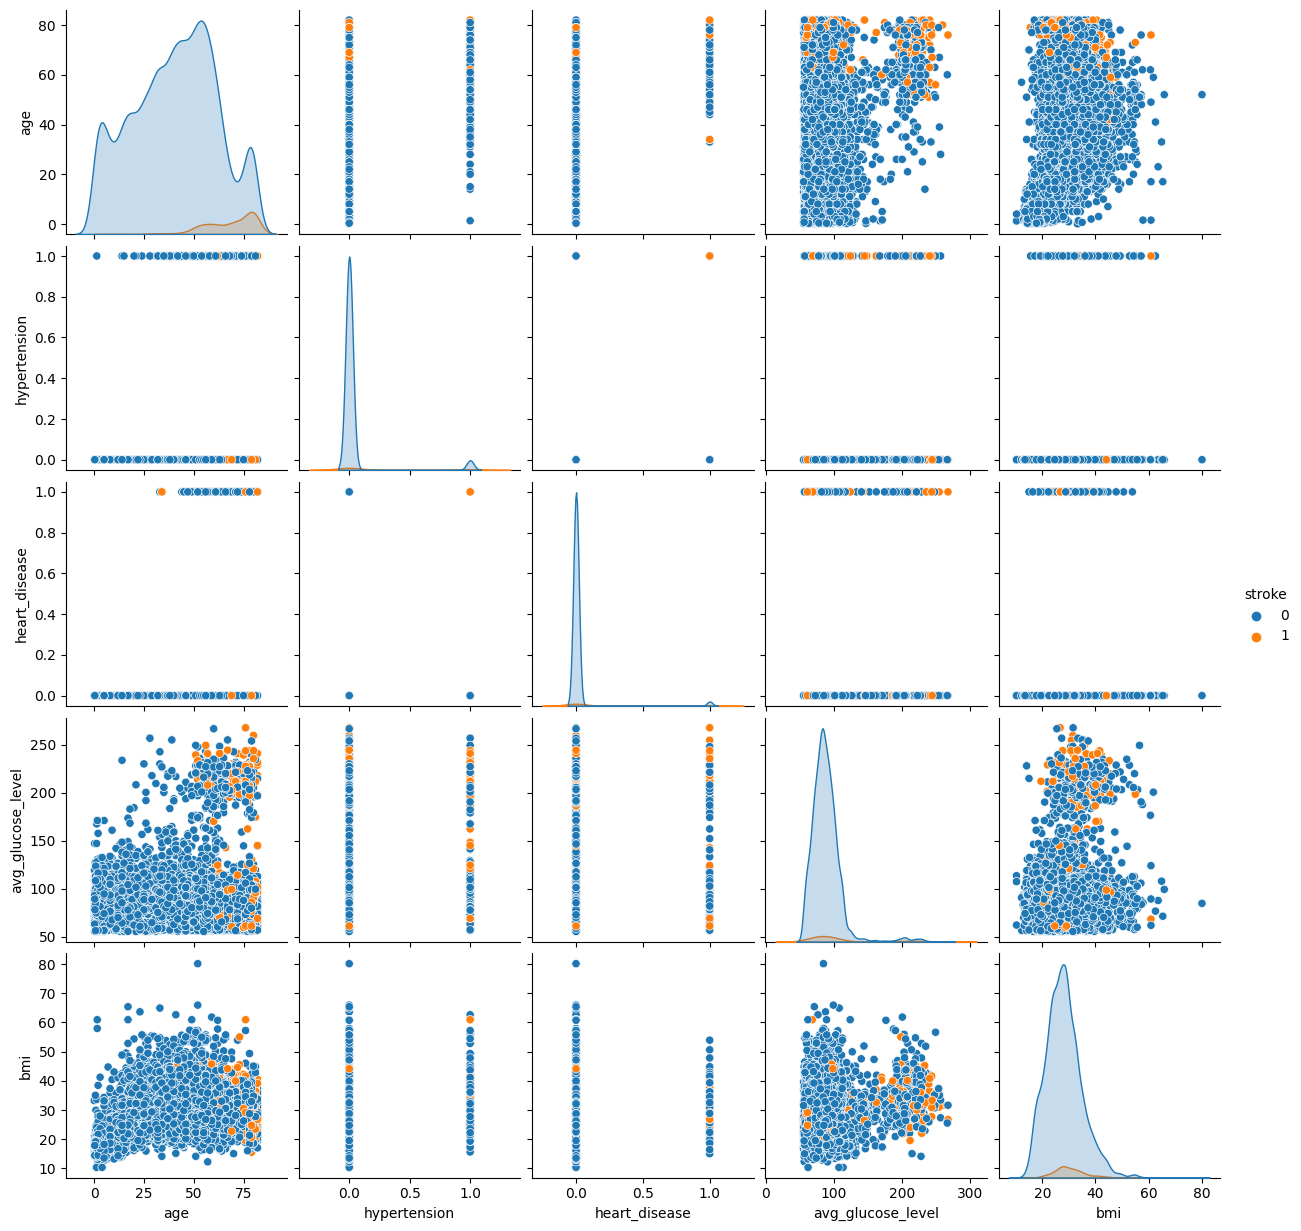

In [10]:
sns.pairplot(numdf,hue='stroke')

<AxesSubplot: >

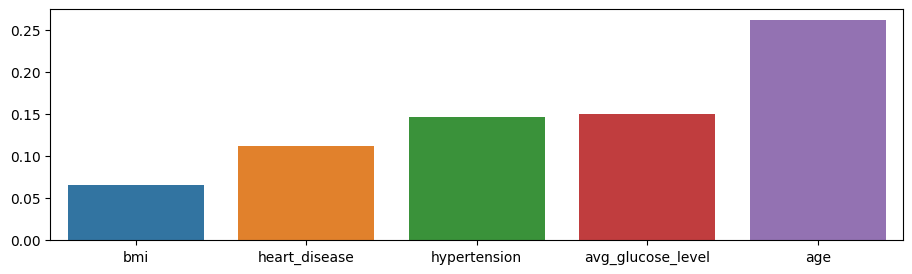

In [11]:
plt.figure(figsize=(11,3))
corr_series = numdf.corr()['stroke'][:-1].sort_values()
sns.barplot(x=corr_series.index,y=corr_series.values)

## Categorical Data

In [12]:
catdf = df.select_dtypes(include=object)

In [13]:
for col in catdf.columns:
    print(col,'has',catdf[col].nunique(),'unique values:',catdf[col].unique())

gender has 3 unique values: ['Male' 'Female' 'Other']
ever_married has 2 unique values: ['Yes' 'No']
work_type has 5 unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type has 2 unique values: ['Urban' 'Rural']
smoking_status has 4 unique values: ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


<AxesSubplot: xlabel='ever_married', ylabel='age'>

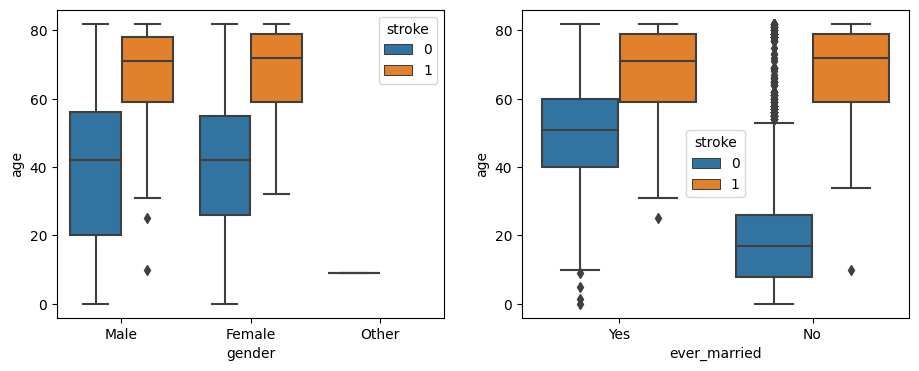

In [14]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))
sns.boxplot(data=df,x='gender',y='age',hue='stroke',ax=ax[0])
sns.boxplot(data=df,x='ever_married',y='age',hue='stroke',ax=ax[1])

<AxesSubplot: xlabel='smoking_status', ylabel='age'>

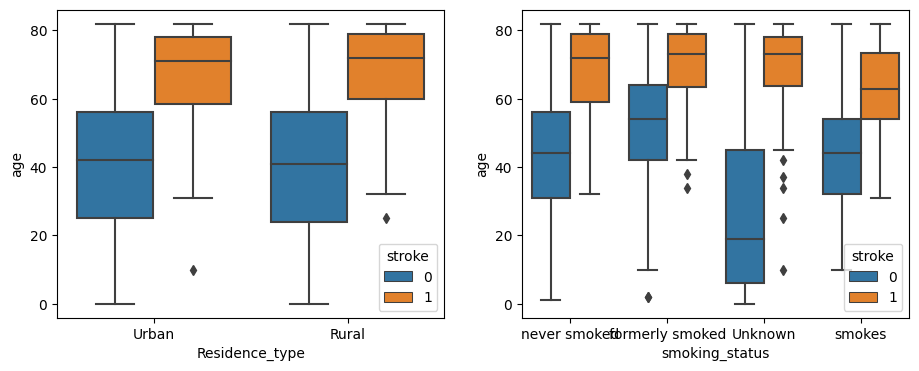

In [15]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))
sns.boxplot(data=df,x='Residence_type',y='age',hue='stroke',ax=ax[0])
sns.boxplot(data=df,x='smoking_status',y='age',hue='stroke',ax=ax[1])

<AxesSubplot: xlabel='work_type', ylabel='age'>

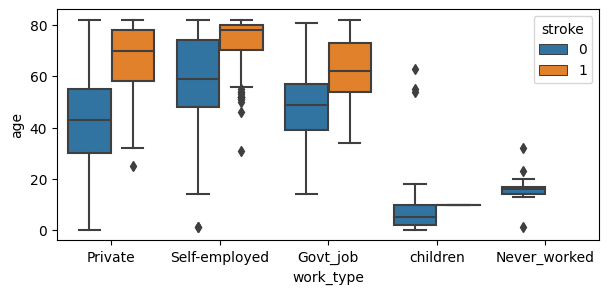

In [16]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df,x='work_type',y='age',hue='stroke')

In [17]:
df['work_type'] = df['work_type'].map({'Private':1,'Self-employed':1,'Govt_job':1,'children':0,'Never_worked':0})

In [18]:
df = df.drop(['gender','Residence_type','smoking_status','ever_married'],axis=1)

## Rechecking what we did

<AxesSubplot: >

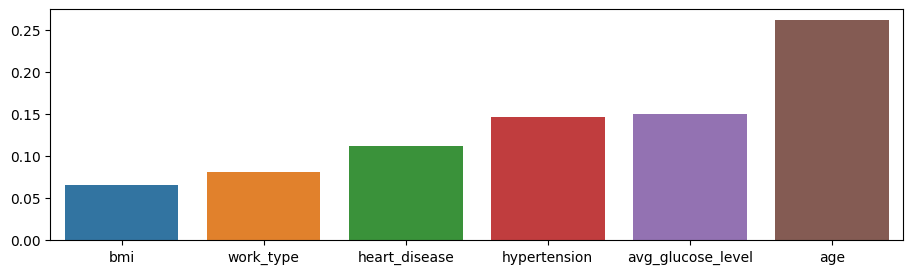

In [19]:
plt.figure(figsize=(11,3))
corr_series = df.corr()['stroke'][:-1].sort_values()
sns.barplot(x=corr_series.index,y=corr_series.values)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                15304 non-null  float64
 1   hypertension       15304 non-null  int64  
 2   heart_disease      15304 non-null  int64  
 3   work_type          15304 non-null  int64  
 4   avg_glucose_level  15304 non-null  float64
 5   bmi                15304 non-null  float64
 6   stroke             15304 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 837.1 KB


## Preparing data from ML

In [21]:
X = df.drop('stroke',axis=1)
y = df['stroke']

### Undersampling to balance classes

In [22]:
if sampling_option == 0:
    X_resampled,y_resampled = X, y

elif sampling_option == 1:
    from imblearn.combine import SMOTETomek
    smt= SMOTETomek()
    X_resampled,y_resampled = smt.fit_resample(X, y)

elif sampling_option == 2:
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=0)
    X_resampled,y_resampled = rus.fit_resample(X, y)

elif sampling_option == 3:
    from imblearn.over_sampling import SMOTE
    s= SMOTE()
    X_resampled,y_resampled = s.fit_resample(X, y)

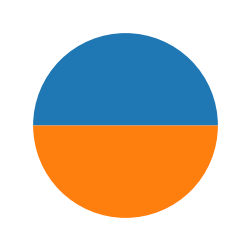

In [23]:
plt.figure(figsize=(3,3))
plt.pie(y_resampled.value_counts())
plt.show()

### Dividing into train and test samples

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

### Scale the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Create and train models

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import time

def create_train_evaluate(model,X_train,y_train,X_test,y_test,param_grid,label='model'):
    
    t0 = time.time()
    
    # Train model
    gs = GridSearchCV(model,param_grid,cv=8)
    gs.fit(X_train,y_train)

    t = (time.time()-t0)/60.
    
    # Evaluate model
    preds = gs.predict(scaled_X_test)

    print(classification_report(y_test,preds))
    print('Best parameters',gs.best_params_)
        
    cm = confusion_matrix(y_test,preds,normalize='all')
    
    fig,ax = plt.subplots(ncols=2,figsize=(9,3))
    ConfusionMatrixDisplay(cm,display_labels=['no stroke','stroke']).plot(ax=ax[0])
    roc = RocCurveDisplay.from_estimator(gs,X_test,y_test,ax=ax[1],name=label)
    ax[1].plot([0,1],[0,1],color='black',ls='--')
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)
    plt.tight_layout()
    
    print('Training took',np.round(t,2),'min')
        
    return gs, roc

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4848
           1       0.93      0.96      0.94      4836

    accuracy                           0.94      9684
   macro avg       0.94      0.94      0.94      9684
weighted avg       0.94      0.94      0.94      9684

Best parameters {'n_estimators': 79}
Training took 0.4 min


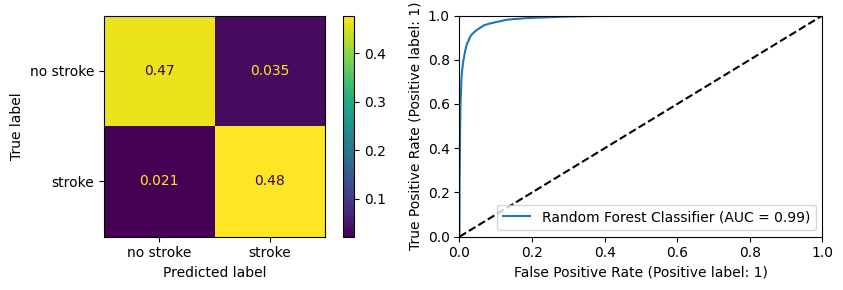

In [27]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[79,80,81]}
rf, rf_roc = create_train_evaluate(RandomForestClassifier(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Random Forest Classifier')

### Boosted Trees

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4848
           1       0.96      0.96      0.96      4836

    accuracy                           0.96      9684
   macro avg       0.96      0.96      0.96      9684
weighted avg       0.96      0.96      0.96      9684

Best parameters {'max_depth': 10, 'n_estimators': 140}
Training took 3.57 min


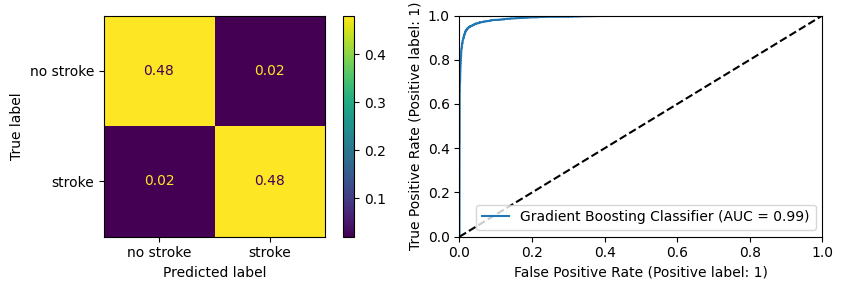

In [28]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
param_grid = {'n_estimators':[130,140],'max_depth':[8,9,10]}
bt, bt_roc = create_train_evaluate(GradientBoostingClassifier(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Gradient Boosting Classifier')

### Logistic regression

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4848
           1       0.78      0.84      0.81      4836

    accuracy                           0.80      9684
   macro avg       0.80      0.80      0.80      9684
weighted avg       0.80      0.80      0.80      9684

Best parameters {'C': 0.001, 'max_iter': 60}
Training took 0.01 min


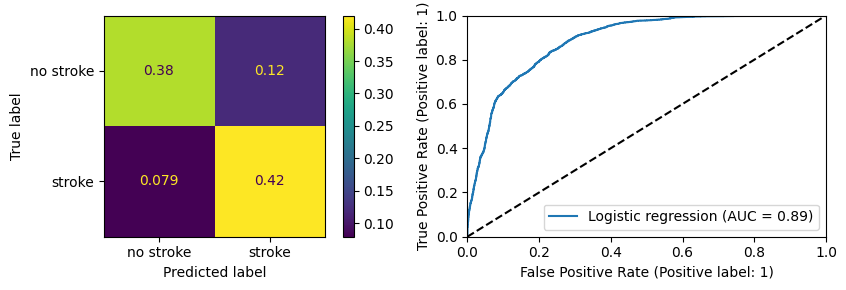

In [29]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.005,0.001,0.01],'max_iter':[60,80,90,100]}
lr, lr_roc = create_train_evaluate(LogisticRegression(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Logistic regression')

### SGD Classifier

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4848
           1       0.80      0.79      0.80      4836

    accuracy                           0.80      9684
   macro avg       0.80      0.80      0.80      9684
weighted avg       0.80      0.80      0.80      9684

Best parameters {'epsilon': 0.2}
Training took 0.01 min


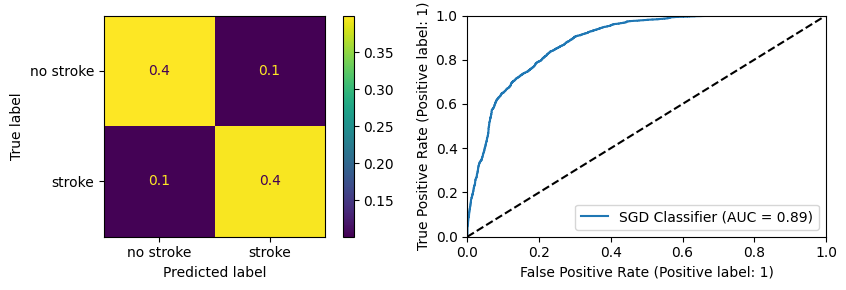

In [30]:
from sklearn.linear_model import SGDClassifier
param_grid = {'epsilon':[0.1,0.05,0.2,0.6,0.8]}
sgd, sgd_roc = create_train_evaluate(SGDClassifier(),scaled_X_train,y_train,
                                     scaled_X_test,y_test,param_grid,'SGD Classifier')

### Feed-Forward NN

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(X.shape[1],'relu'))
model.add(Dropout(0.5))
model.add(Dense(8,'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=7)

model.fit(x=scaled_X_train,y=y_train,validation_data=(scaled_X_test,y_test),epochs=100,
          verbose=0,callbacks=[early_stop])

2023-01-12 19:14:20.790521: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Text(0, 0.5, 'loss')

<Figure size 640x480 with 0 Axes>

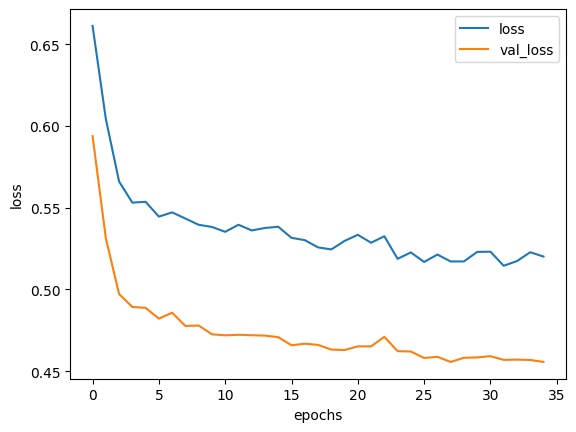

In [32]:
plt.figure()
history = pd.DataFrame(model.history.history)
history.plot()
plt.xlabel('epochs')
plt.ylabel('loss')

303/303 [==============================] - 0s 240us/step


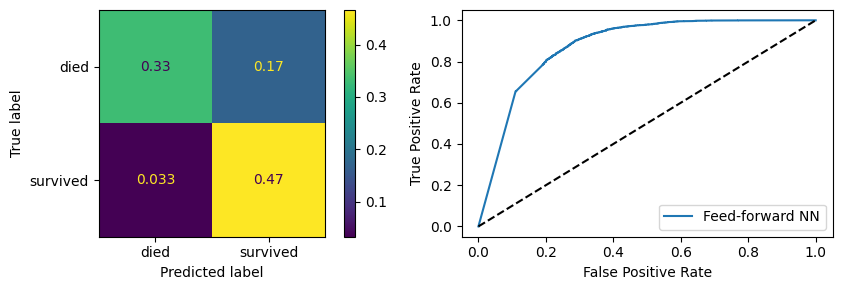

In [33]:
preds_proba = model.predict(scaled_X_test)
preds = (preds_proba>0.5).astype(int)

#preds =model.predict(scaled_X_test).ravel()
cm = confusion_matrix(y_test,preds,normalize='all')
fpr, tpr, thresh = roc_curve(y_test,preds_proba)

fig,ax = plt.subplots(ncols=2,figsize=(9,3))
ConfusionMatrixDisplay(cm,display_labels=['died','survived']).plot(ax=ax[0])
nn_roc = RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name='Feed-forward NN')
nn_roc.plot(ax=ax[1])
ax[1].plot([0,1],[0,1],color='black',ls='--')
plt.tight_layout()

(0.0, 1.0)

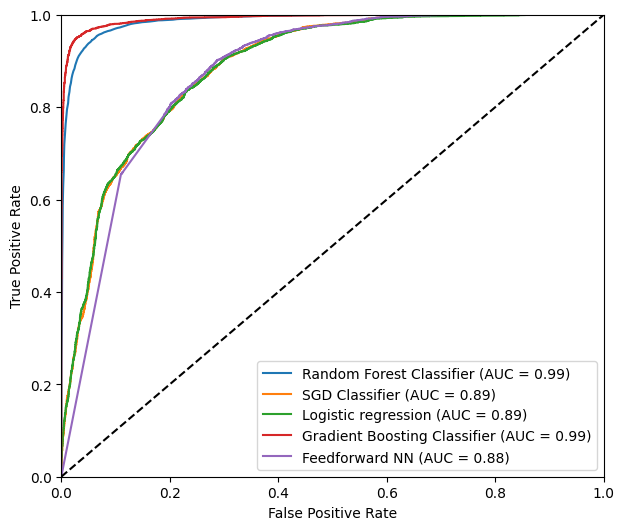

In [34]:
from sklearn.metrics import auc

fig,ax = plt.subplots(figsize=(7,6))

nn_roc.estimator_name = 'Feedforward NN (AUC = {})'.format(np.round(auc(fpr,tpr),2))

rf_roc.plot(ax=ax)
sgd_roc.plot(ax=ax)
lr_roc.plot(ax=ax)
bt_roc.plot(ax=ax)
nn_roc.plot(ax=ax)
ax.plot([0,1],[0,1],color='black',ls='--')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# The winner is the Gradient Boosting Classifier.
Will retrain with the entire dataset and then use to make predictions on the unlabeled test set

### retraining model

In [35]:
final_model = GradientBoostingClassifier(n_estimators=140,max_depth=10)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_resampled)

final_model.fit(scaled_X,y_resampled)

GradientBoostingClassifier(max_depth=10, n_estimators=140)

### Loading and processing unlabeled set

In [36]:
df_test = pd.read_csv('synthetic_data/test.csv')
col_id = df_test['id']
df_test = df_test.drop('id',axis=1)

In [37]:
df_test['work_type'] = df_test['work_type'].map({'Private':1,'Self-employed':1,'Govt_job':1,
                                                 'children':0,'Never_worked':0})
df_test = df_test.drop(['gender','Residence_type','smoking_status','ever_married'],axis=1)

### Making predictions and saving results for submission

In [38]:
scaled_df_test = scaler.transform(df_test)

In [39]:
labels = final_model.predict(df_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [40]:
submission = pd.concat([col_id,pd.Series(labels,name='stroke')],axis=1)
submission.to_csv('submission.csv',index=False)